In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

file_path = r"C:\Users\Kajal\Downloads\spam.csv"

# Try reading the CSV file with different encodings
try:
    data = pd.read_csv(file_path, encoding='utf-8-sig')
except UnicodeDecodeError:
    try:
        data = pd.read_csv(file_path, encoding='latin1')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Now you can work with the 'data' DataFrame


In [3]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3667,ham,Thanks for loving me so. You rock,NaN,NaN,NaN
4020,ham,We have to pick rayan macleran there.,NaN,NaN,NaN
5075,ham,"Well, i'm glad you didn't find it totally disa...",NaN,NaN,NaN
4522,ham,Actually I decided I was too hungry so I haven...,NaN,NaN,NaN
2874,ham,"Idk. You keep saying that you're not, but sinc...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

# data cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#dropping last three columns as they are mostly empty
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
data.sample(10)

,v1,v2
4007,ham,"Forgot you were working today! Wanna chat, but..."
3244,ham,"Its ok, if anybody asks abt me, u tel them..:-P"
2062,ham,Is there any training tomorrow?
4728,ham,I've reached already.
2794,ham,How will I creep on you now? ;_;
3653,ham,Why i come in between you people
4626,spam,Please call our customer service representativ...
5501,spam,PRIVATE! Your 2003 Account Statement for 07808...
763,ham,Nothing but we jus tot u would ask cos u ba gu...
353,ham,Yo you guys ever figure out how much we need f...


In [9]:
#rename the columns
data.rename(columns={'v1':'target','v2':'text'},inplace=True)
data.sample(8)

,target,text
4660,ham,Ok no prob...
2286,ham,I have had two more letters from . I will copy...
622,ham,MAKE SURE ALEX KNOWS HIS BIRTHDAY IS OVER IN F...
755,ham,So why didnt you holla?
2500,ham,Remember to ask alex about his pizza
557,ham,I know that my friend already told that.
1702,ham,I have lost 10 kilos as of today!
4930,ham,"Good morning, my boytoy! How's those yummy lip..."


In [10]:
#label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
data['target']=encoder.fit_transform(data['target'])
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#missing values checking
data.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#check for duplicate values
data.duplicated().sum()

403

In [14]:
#remove duplicate
data=data.drop_duplicates(keep='first')

In [15]:
data.duplicated().sum()

0

In [16]:
data.shape

(5169, 2)

# EDA

In [17]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

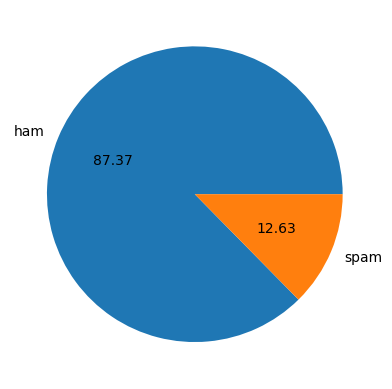

In [19]:
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
#data is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kajal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
data['num_characters']=data['text'].apply(len)

In [24]:
data.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#number of words

In [26]:
data['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [27]:
data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
data.head(5)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
data['num_sentences']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
#ham
data[data['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
#spam
data[data['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

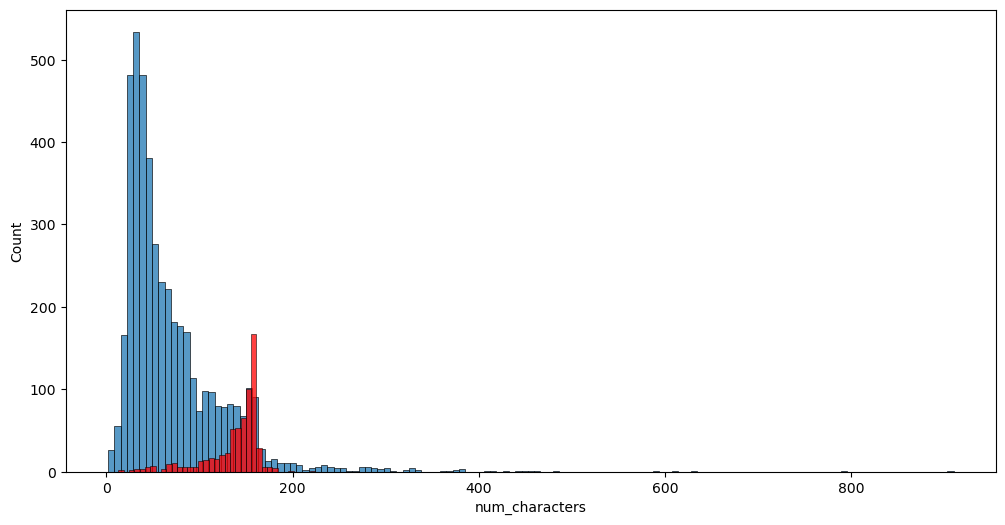

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_characters'])
sns.histplot(data[data['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

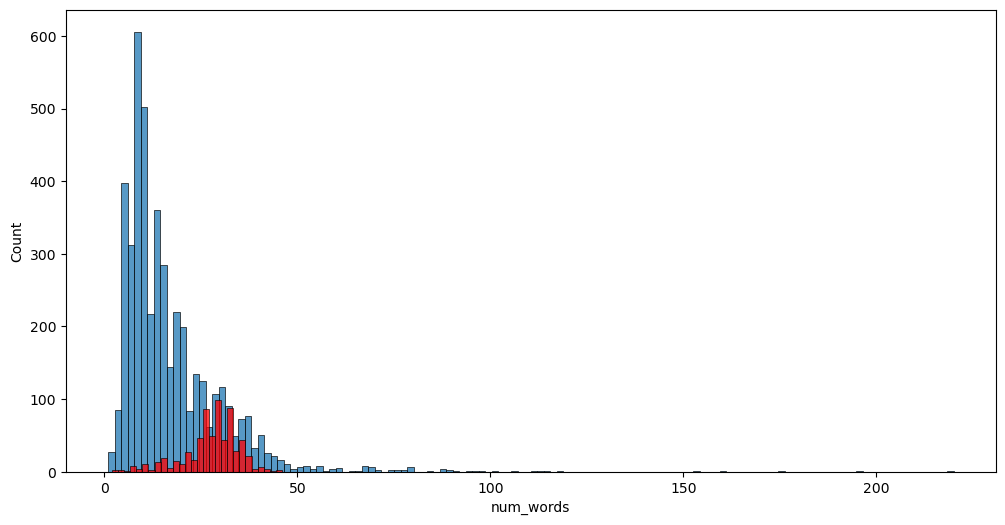

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_words'])
sns.histplot(data[data['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

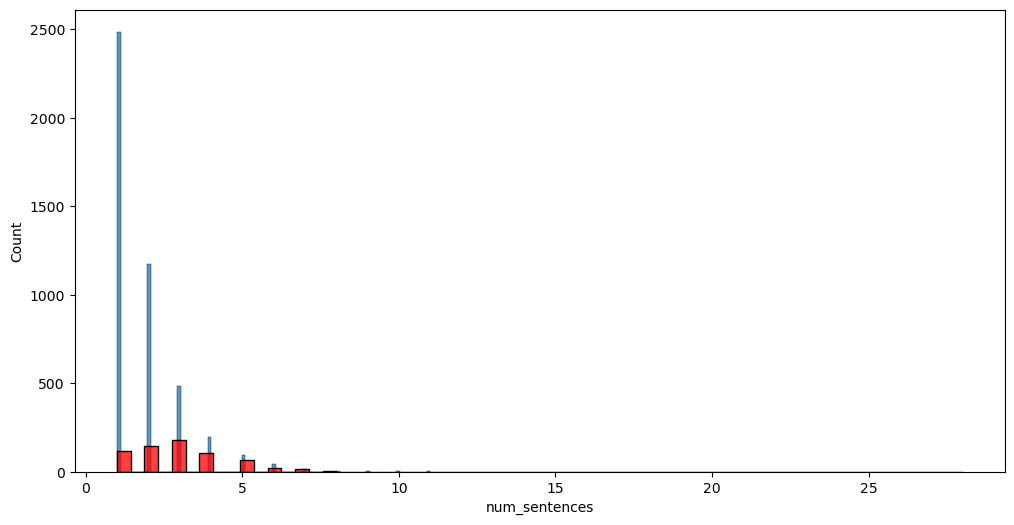

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_sentences'])
sns.histplot(data[data['target']==1]['num_sentences'],color='red')

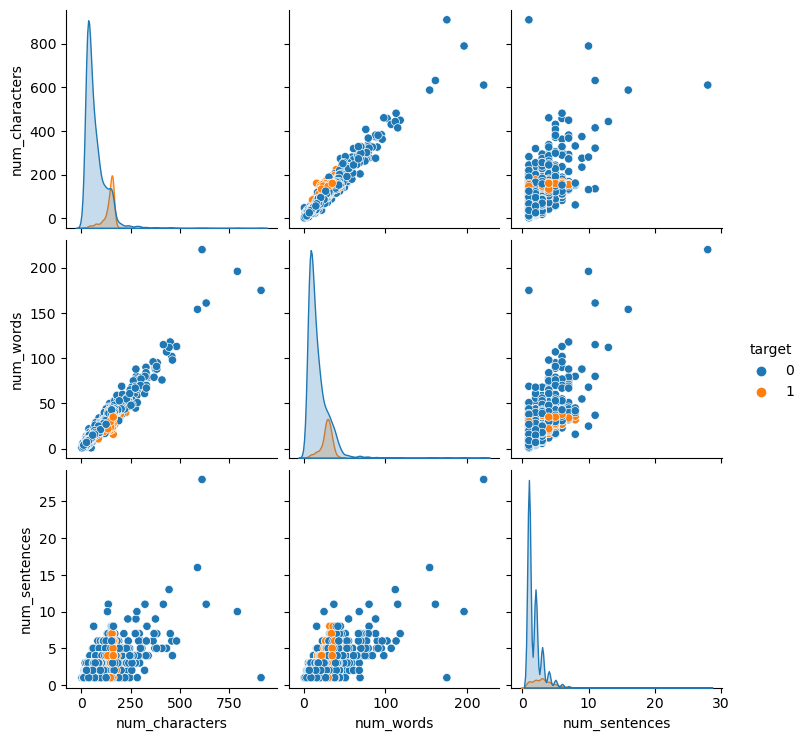

In [38]:
#relation btw no of words and no. of columns
sns.pairplot(data,hue='target')

In [39]:
data.corr()

C:\Users\Kajal\AppData\Local\Temp\ipykernel_22772\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


C:\Users\Kajal\AppData\Local\Temp\ipykernel_22772\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

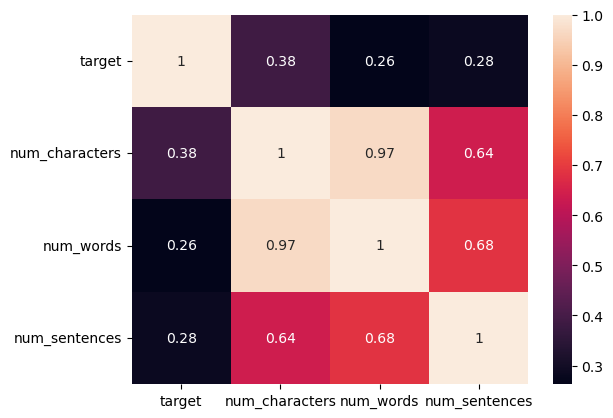

In [40]:
sns.heatmap(data.corr(),annot=True)

# Data Preprocessing

In [41]:
def transform_text(text):
    #lower case changing
    text=text.lower()
    #tokenization
    text=nltk.word_tokenize(text)
    
    #removing special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    #removing stopwords and punctuations
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    #stemming
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [42]:
#removing stopwords and punctuations
from nltk.corpus import stopwords
stopwords.words('english')
#all the words list will be given which are called as stopwords......has no contribution in the meaning of the sentences but in formation

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
#punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
#stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [45]:
#doing transformation in our whole dataset
data['transformed_text']=data['text'].apply(transform_text)


In [46]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
#word cloud 
#it makes the important words bigger in size
!pip install wordcloud

In [48]:
from wordcloud import WordCloud 
wc=WordCloud(width=900,height=900,min_font_size=5,background_color='white')

In [49]:
spam_wc=wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

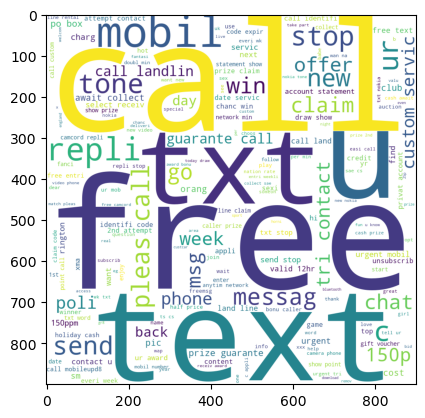

In [50]:
plt.imshow(spam_wc)

In [51]:
spam_wc=wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))

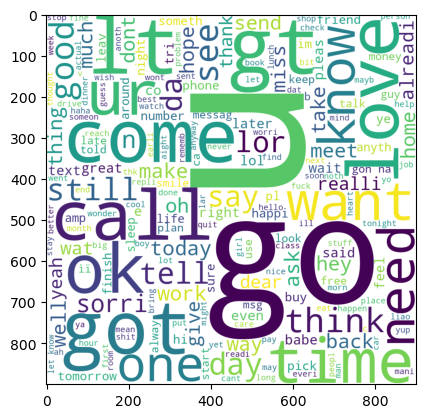

In [52]:
plt.imshow(spam_wc)

In [53]:
# as spam=1....top words which are being used in the messages
spam_corpus=[]
for msg in data[data['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9939

In [55]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))


,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [56]:
ham_corpus=[]
for msg in data[data['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

35394

In [58]:
pd.DataFrame(Counter(ham_corpus).most_common(30))


,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


# model building


In [59]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
# bag of words ~ text vectorizer

In [61]:
X=cv.fit_transform(data['transformed_text']).toarray()

In [62]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [63]:
X.shape

(5169, 6708)

In [64]:
y=data['target'].values

In [65]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [69]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
# gnb output

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [70]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
# mnb output

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [71]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
# bnb output

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(data['transformed_text']).toarray()
X.shape

(5169, 6708)

In [73]:
y=data['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [75]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
# gnb output

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [76]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
# mnb output

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [77]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
# bnb output

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [78]:
# now we have to coose between bnb and mnb, since precision is given more priority in this case therefore will be
#choosing mnb as accuracy is not reliable
#tfidf--> mnb

In [79]:
pip install xgboost

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [81]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [82]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [83]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [84]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9729206963249516, 0.9741379310344828)

In [87]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.9738878143133463
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9365079365079365


In [88]:
performance_data = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [89]:
performance_data

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.972921,0.936508
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [90]:
performance_data1 = pd.melt(performance_data, id_vars = "Algorithm")

In [91]:
performance_data1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.973888
3,ETC,Accuracy,0.975822
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,LR,Accuracy,0.951644
7,xgb,Accuracy,0.972921
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


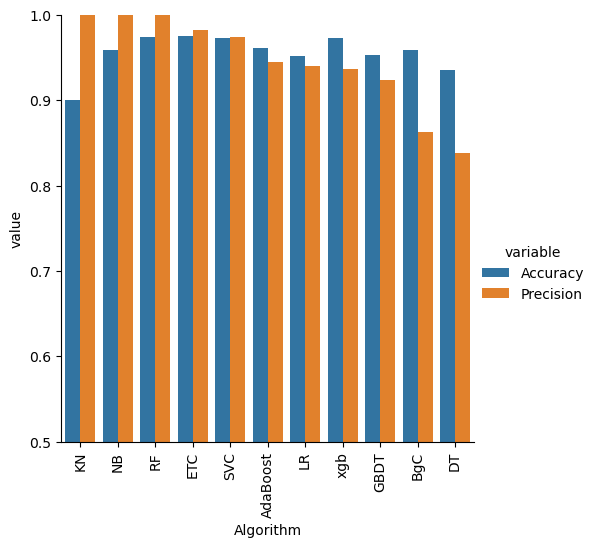

In [92]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_data1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [93]:
#model improve
#changing max_features parameter of Tdidf

In [94]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=1000)

In [96]:
X = tfidf.fit_transform(data['transformed_text']).toarray()


In [97]:
X.shape


(5169, 1000)

In [98]:
y = data['target'].values

In [99]:
from sklearn.model_selection import train_test_split


In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [101]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [102]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [103]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7804642166344294
[[687 209]
 [ 18 120]]
0.364741641337386


In [104]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9777562862669246
[[895   1]
 [ 22 116]]
0.9914529914529915


In [105]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[893   3]
 [ 14 124]]
0.9763779527559056


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [107]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [108]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [109]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [110]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9700193423597679, 0.9572649572649573)

In [111]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9700193423597679
Precision -  0.9572649572649573
For  KN
Accuracy -  0.9168278529980658
Precision -  1.0
For  NB
Accuracy -  0.9777562862669246
Precision -  0.9914529914529915
For  DT
Accuracy -  0.9390715667311412
Precision -  0.8640776699029126
For  LR
Accuracy -  0.960348162475822
Precision -  0.9532710280373832
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9512195121951219
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9243697478991597
For  BgC
Accuracy -  0.9632495164410058
Precision -  0.890625
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.967479674796748
For  GBDT
Accuracy -  0.9535783365570599
Precision -  0.9411764705882353
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9583333333333334


In [112]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [113]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.916828
1,NB,Accuracy,0.977756
2,ETC,Accuracy,0.977756
3,xgb,Accuracy,0.972921
4,SVC,Accuracy,0.970019
5,LR,Accuracy,0.960348
6,RF,Accuracy,0.973888
7,GBDT,Accuracy,0.953578
8,AdaBoost,Accuracy,0.964217
9,BgC,Accuracy,0.963250


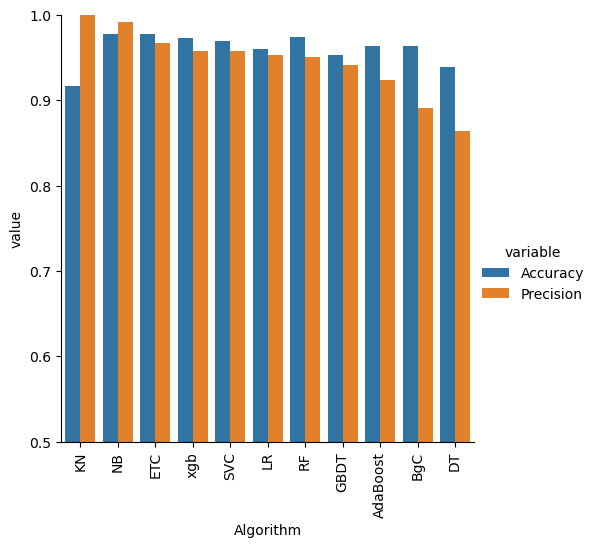

In [114]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [115]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [116]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.916828,1.000000,0.916828,1.000000
1,NB,0.977756,0.991453,0.977756,0.991453
2,ETC,0.977756,0.967480,0.977756,0.967480
3,xgb,0.972921,0.958333,0.972921,0.958333
4,SVC,0.970019,0.957265,0.970019,0.957265
5,LR,0.960348,0.953271,0.960348,0.953271
6,RF,0.973888,0.951220,0.973888,0.951220
7,GBDT,0.953578,0.941176,0.953578,0.941176
8,AdaBoost,0.964217,0.924370,0.964217,0.924370
9,BgC,0.963250,0.890625,0.963250,0.890625


In [117]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [118]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [119]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
